In [1]:
#The last 100 most recent tweets were pulled.
#The tweets were pulled from BBC, CBS, CNN, Fox News and New York Times

#Observable Trends: 
# 1.) Based on the most recent 100 tweets, CBS has the most positive overall sentiment.  
# 2.) Based on the most recent 100 tweets, CNN and New York Times have the most negative sentiment. 
# 3.) Based on the most recent 100 tweets, Fox News has posted the same amount of tweets in the positive,
# neutral, and negative categories. 


In [2]:
#import dependencies
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import csv

In [3]:
#vader sentimenet
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Twitter API Keys
from config import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
target_news = ('@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes')

data = {}

for news in target_news:
    counter = 1
    
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweet_text = []
    date_list = []
    tweets_ago = []

    # Get all tweets from home feed
    public_tweets = api.user_timeline(news, count = 200, include_rts = False)

    for tweet in public_tweets:
        results = analyzer.polarity_scores(tweet['text'])
        date_list.append(tweet["created_at"])
        compound_list.append(results['compound'])
        positive_list.append(results['pos'])
        neutral_list.append(results['neu'])
        negative_list.append(results['neg'])
        tweet_text.append(str(tweet['text']))
        tweets_ago.append(counter)
        
        counter = counter + 1
        
    data_set = {'compound': compound_list, 'positive': positive_list,
               'neutral': neutral_list, 'negative': negative_list, 
               'Date': date_list, 'tweets_ago': tweets_ago,
               'tweet': tweet_text}
    
    data[news] = data_set
    

In [6]:
CBS = pd.DataFrame(data['@CBS'])
CBS_df = CBS.iloc[0:100,:]
CBS_df = CBS_df.sort_values(by='tweets_ago', ascending=False)
CBS_df['news source'] = 'CBS'

BBC = pd.DataFrame(data['@BBC'])
BBC_df = BBC.iloc[0:100,:]
BBC_df = BBC_df.sort_values(by='tweets_ago', ascending=False)
BBC_df['news source'] = 'BBC'

FOX = pd.DataFrame(data['@FoxNews'])
FOX_df = FOX.iloc[0:100,:]
FOX_df = FOX_df.sort_values(by='tweets_ago', ascending=False)
FOX_df['news source'] = 'Fox News'

CNN = pd.DataFrame(data['@CNN'])
CNN_df = CNN.iloc[0:100,:]
CNN_df = CNN_df.sort_values(by='tweets_ago', ascending=False)
CNN_df['news source'] = 'CNN'

NYT = pd.DataFrame(data['@nytimes'])
NYT_df = NYT.iloc[0:100,:]
NYT_df = NYT_df.sort_values(by='tweets_ago', ascending=False)
NYT_df['news source'] = 'New York Times'

everything = [CBS_df, BBC_df, FOX_df, CNN_df, NYT_df]

everything_df = pd.concat(everything)
everything_df.head()

,compound,positive,neutral,negative,Date,tweets_ago,tweet,news source
99,0.2732,0.176,0.719,0.105,Wed Jun 06 21:00:24 +0000 2018,100,Don’t miss a special performance from @springs...,CBS
98,0.3612,0.128,0.872,0.000,Thu Jun 07 17:03:26 +0000 2018,99,Get ready for show-stopping performances by th...,CBS
97,0.9078,0.436,0.564,0.000,Fri Jun 08 13:58:15 +0000 2018,98,We all get by with a little help from our frie...,CBS
96,0.0000,0.000,1.000,0.000,Fri Jun 08 15:00:03 +0000 2018,97,Here's @laChanze with a reminder that you can ...,CBS
95,0.2960,0.180,0.820,0.000,Fri Jun 08 19:46:17 +0000 2018,96,Join @etnow's @DDirecto this Sunday on the #To...,CBS


In [7]:
everything_df.to_csv('news.csv',encoding='utf-8-sig', index=False)

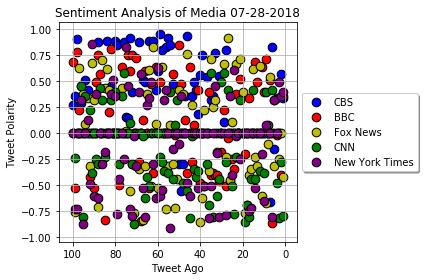

In [8]:
#The first plot will be and/or feature the following:

#Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization,
#ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative 
#sentiment possible, and +1 the most positive sentiment possible.

#Each plot point will reflect the compound sentiment of a tweet.

#Sort each plot point by its relative timestamp.
now = datetime.datetime.now()

x = CBS_df['tweets_ago']
plt.scatter(x,CBS_df['compound'], label = 'CBS', s = 75, marker = 'o', facecolor = 'b', edgecolor = 'k')
plt.scatter(x,BBC_df['compound'], label = 'BBC', s = 75, marker = 'o', facecolor = 'r', edgecolor = 'k')
plt.scatter(x,FOX_df['compound'], label = 'Fox News', s = 75, marker = 'o', facecolor = 'y', edgecolor = 'k')
plt.scatter(x,CNN_df['compound'], label = 'CNN', s = 75, marker = 'o', facecolor = 'g', edgecolor = 'k')
plt.scatter(x,NYT_df['compound'], label = 'New York Times', s = 75, marker = 'o',
            facecolor = 'purple', edgecolor = 'k')
plt.gca().invert_xaxis()
plt.xlabel('Tweet Ago')
plt.ylabel('Tweet Polarity')
DateNow = now.strftime("%m-%d-%Y")
plt.title('Sentiment Analysis of Media ' + DateNow)
plt.grid(True)
plt.legend(loc="lower center")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5),
          fancybox=True, shadow=True, ncol=1)
plt.tight_layout()
plt.savefig("SentimentAnalysis.png", dpi = 150)

plt.show()

In [9]:
#The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each 
#organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.
CBS_mean = CBS_df['compound'].mean()
BBC_mean = BBC_df['compound'].mean()
CNN_mean = CNN_df['compound'].mean()
FOX_mean = FOX_df['compound'].mean()
NYT_mean = NYT_df['compound'].mean()

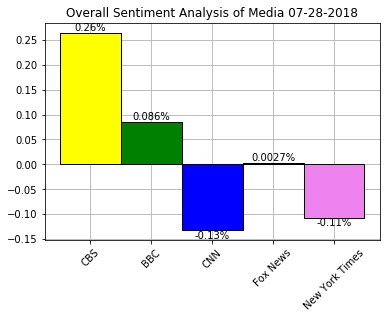

In [11]:
ticks = np.arange(5)
names = ['CBS', 'BBC', 'CNN', 'Fox News', 'New York Times']
barwidth = 1

plt.grid()
plt.rc('axes', axisbelow=True)

plt.bar(ticks[0], CBS_mean, width = barwidth, color = 'yellow', edgecolor = 'k', label='CBS')
cbs = np.float(CBS_mean)
cbs = "{:0.2}%".format(cbs)
plt.text(ticks[0], CBS_mean, str(cbs), horizontalalignment='center', verticalalignment = 'bottom')

plt.bar(ticks[1], BBC_mean, width = barwidth, color = 'green', edgecolor = 'k', label='BBC')
bbc = np.float(BBC_mean)
bbc = "{:0.2}%".format(bbc)
plt.text(ticks[1], BBC_mean, str(bbc), horizontalalignment='center', verticalalignment = 'bottom')

plt.bar(ticks[2], CNN_mean, width = barwidth, color = 'blue', edgecolor = 'k', label='CNN')
cnn = np.float(CNN_mean)
cnn = "{:0.2}%".format(cnn)
plt.text(ticks[2], CNN_mean, str(cnn), horizontalalignment='center', verticalalignment = 'top')

plt.bar(ticks[3], FOX_mean, width = barwidth, color = 'red', edgecolor = 'k', label='Fox News')
fox = np.float(FOX_mean)
p = "{:0.2}%".format(fox)
plt.text(ticks[3], FOX_mean, str(p), horizontalalignment='center', verticalalignment = 'bottom')

plt.bar(ticks[4], NYT_mean, width = barwidth, color = 'violet', edgecolor = 'k', label='New York Times')
nyt = np.float(NYT_mean)
p = "{:0.2}%".format(nyt)
plt.text(ticks[4], NYT_mean, str(p), horizontalalignment='center', verticalalignment = 'top')

plt.xticks(ticks, names, rotation=45)

DateNow = now.strftime("%m-%d-%Y")
plt.title('Overall Sentiment Analysis of Media ' + DateNow)
plt.savefig("OverallSentimentAnalysis.png", dpi = 150)
plt.show()